In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from scipy.stats import zscore
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_performance_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [71]:
student_performance_df.info()
student_performance_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?


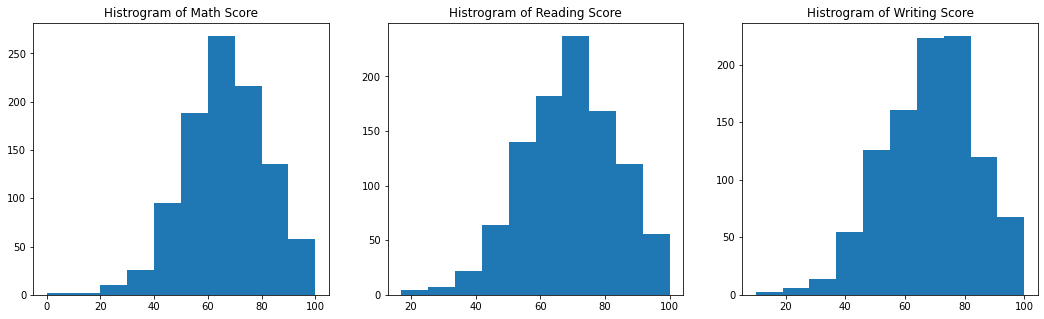

In [27]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(student_performance_df['math score'])
plt.title('Histrogram of Math Score')

plt.subplot(1,3,2)
plt.hist(student_performance_df['reading score'])
plt.title('Histrogram of Reading Score')

plt.subplot(1,3,3)
plt.hist(student_performance_df['writing score'])
plt.title('Histrogram of Writing Score')
plt.show()

They plots above does not show an evenly districution of Data on all scores.

In [41]:
#Math scores as some 0 values. Boxcox transformation requires all positive bvalues
student_performance_df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [42]:
#Creating a dataset without the 0 values
math_pos = student_performance_df[student_performance_df['math score'] > 0]
math_pos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [43]:
#Boxcox transformation
math,_ = boxcox(math_pos['math score'])
reading,_ = boxcox(student_performance_df['reading score'])
writing,_ = boxcox(student_performance_df['writing score'])

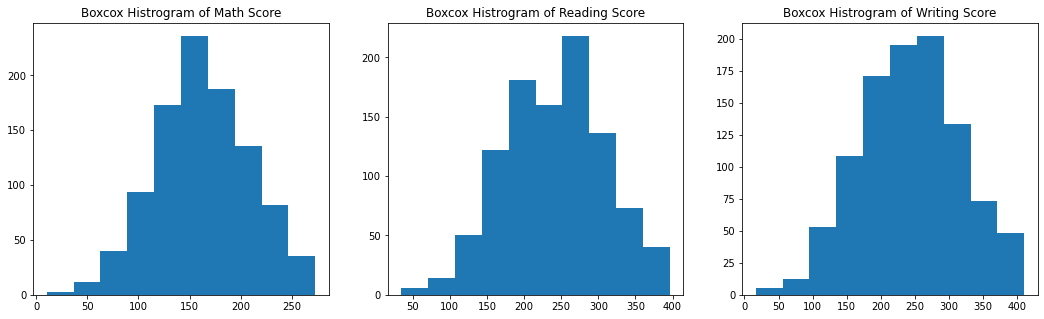

In [51]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(math)
plt.title('Boxcox Histrogram of Math Score')

plt.subplot(1,3,2)
plt.hist(reading)
plt.title('Boxcox Histrogram of Reading Score')

plt.subplot(1,3,3)
plt.hist(writing)
plt.title('Boxcox Histrogram of Writing Score')
plt.show()

The Math scores now shows a more evenly distriputed plot, but still are not normally distributed.using a Jarque-Bara and Normal test will confirm this

In [75]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stat = jarque_bera(student_performance_df['math score'])
norm_stat = normaltest(student_performance_df['math score'])

print("Jarque-Bera Math test statistics is {0} and p value is {1}".format(jb_stat[0], jb_stat[1]))
print("Normality Math test statistics is {0} and p value is {1}".format(norm_stat[0], norm_stat[1]))
print()

jb_stat = jarque_bera(student_performance_df['reading score'])
norm_stat = normaltest(student_performance_df['reading score'])

print("Jarque-Bera Reading test statistics is {0} and p value is {1}".format(jb_stat[0], jb_stat[1]))
print("Normality Reading test statistics is {0} and p value is {1}".format(norm_stat[0], norm_stat[1]))
print()

jb_stat = jarque_bera(student_performance_df['writing score'])
norm_stat = normaltest(student_performance_df['writing score'])

print("Jarque-Bera Writing test statistics is {0} and p value is {1}".format(jb_stat[0], jb_stat[1]))
print("Normality Writing test statistics is {0} and p value is {1}".format(norm_stat[0], norm_stat[1]))

Jarque-Bera Math test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality Math test statistics is 15.408960513931822 and p value is 0.00045080293869937836

Jarque-Bera Reading test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality Reading test statistics is 11.11741279628622 and p value is 0.003853758403576582

Jarque-Bera Writing test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality Writing test statistics is 13.606450837263859 and p value is 0.0011101885439899974


In [83]:
jb_stat = jarque_bera(math)
norm_stat = normaltest(math)

print("Jarque-Bera Math BoxCox test statistics is {0} and p value is {1}".format(jb_stat[0], jb_stat[1]))
print("Normality Math BoxCox test statistics is {0} and p value is {1}".format(norm_stat[0], norm_stat[1]))
print()

jb_stat = jarque_bera(reading)
norm_stat = normaltest(reading)

print("Jarque-Bera Reading BoxCox test statistics is {0} and p value is {1}".format(jb_stat[0], jb_stat[1]))
print("Normality Reading BoxCox test statistics is {0} and p value is {1}".format(norm_stat[0], norm_stat[1]))
print()

jb_stat = jarque_bera(writing)
norm_stat = normaltest(writing)

print("Jarque-Bera Reading BoxCox test statistics is {0} and p value is {1}".format(jb_stat[0], jb_stat[1]))
print("Normality Reading BoxCox test statistics is {0} and p value is {1}".format(norm_stat[0], norm_stat[1]))


Jarque-Bera Math BoxCox test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality Math BoxCox test statistics is 1.8323075851586939 and p value is 0.4000547794685686

Jarque-Bera Reading BoxCox test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality Reading BoxCox test statistics is 5.282274606965809 and p value is 0.07128015626992971

Jarque-Bera Reading BoxCox test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality Reading BoxCox test statistics is 6.267311355052559 and p value is 0.04355827085003712


#### Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [85]:
#Creating a new variable taking the weighted average of the exam score
weighted_avg = (student_performance_df['math score'] + 
               student_performance_df['reading score'] +
               student_performance_df['writing score']) / 3

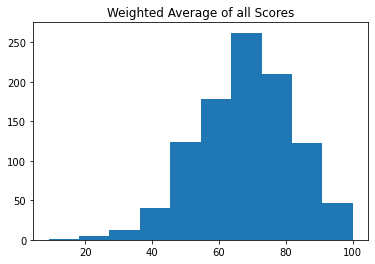

In [86]:
#Checking if this variable is normally distributed
plt.hist(weighted_avg)
plt.title('Weighted Average of all Scores')
plt.show()

In [89]:
#If not normally distributed
#Verify with both Jarque-Bara and normal test

jb_stat = jarque_bera(weighted_avg)
norm_stat = normaltest(weighted_avg)

print("Jarque-Bera Weighted Average test statistics is {0} and p value is {1}".format(jb_stat[0], jb_stat[1]))
print()
print("Normality Weighted Average test statistics is {0} and p value is {1}".format(norm_stat[0], norm_stat[1]))

Jarque-Bera Weighted Average test statistics is 15.453387913085168 and p value is 0.00044089934264401887

Normality Weighted Average test statistics is 15.186721327231322 and p value is 0.0005037851534494478


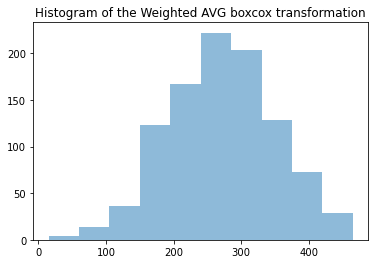

In [95]:
#apply a boxcox transformation and check if transformation is normally distributed

weighted_avg_boxcox,_ = boxcox(weighted_avg)

plt.hist(weighted_avg_boxcox, alpha=0.5)
plt.title('Histogram of the Weighted AVG boxcox transformation')
plt.show()

The transformation appears to be more normally distributed

#### Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?